In [21]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.3
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.4.0
astunparse                    1.6.3
async-lru                     2.0.4
async-timeout                 4.0.2
atomicwrit

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 0.2, shear_range = 0.2,
                                   zoom_range = 0.2,width_shift_range = 0.2,
                                       height_shift_range = 0.2,validation_split = 0.2)

In [3]:
train_data = train_datagen.flow_from_directory(r'C:\Users\DELL\Desktop\Major Project\Prepared_data\train',
                                               target_size = (80,80), batch_size = 64, class_mode = 'categorical' , subset = 'training')

Found 64524 images belonging to 2 classes.


In [4]:
validation_data = train_datagen.flow_from_directory(r'C:\Users\DELL\Desktop\Major Project\Prepared_data\train',
                                               target_size = (80,80), batch_size = 64, class_mode = 'categorical', subset = 'validation')

Found 16129 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_data = train_data = test_datagen.flow_from_directory(r'C:\Users\DELL\Desktop\Major Project\Prepared_data\test',
                                               target_size = (80,80), batch_size = 64, class_mode = 'categorical')

Found 4245 images belonging to 2 classes.


In [7]:
bmodel = VGG16(include_top = False, weights = None,
                     input_tensor = Input(shape = (80,80,3), batch_size = 64))
# for layer in bmodel.layers[0:-10]:
#     layer.trainable = false

In [8]:
bmodel.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (64, 80, 80, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (64, 80, 80, 64)       │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (64, 80, 80, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (64, 40, 40, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (64, 40, 40, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (64, 40, 40, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (64, 20, 20, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (64, 20, 20, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (64, 20, 20, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (64, 20, 20, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (64, 10, 10, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (64, 10, 10, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (64, 10, 10, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (64, 10, 10, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (64, 5, 5, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (64, 5, 5, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (64, 5, 5, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (64, 5, 5, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (64, 2, 2, 512)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation  = 'relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation = 'softmax')(hmodel)

In [10]:
model = Model(inputs = bmodel.input, outputs = hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [12]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (64, 80, 80, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (64, 80, 80, 64)       │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (64, 80, 80, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (64, 40, 40, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (64, 40, 40, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (64, 40, 40, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (64, 20, 20, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (64, 20, 20, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (64, 20, 20, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (64, 20, 20, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (64, 10, 10, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (64, 10, 10, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (64, 10, 10, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (64, 10, 10, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (64, 5, 5, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (64, 5, 5, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (64, 5, 5, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (64, 5, 5, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (64, 2, 2, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (64, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 64)               │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (64, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,845,954 (56.63 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [14]:
checkpoint = ModelCheckpoint(r'C:\Users\DELL\Desktop\Major Project\model\my_modelVGG16.keras',
                             monitor = 'val_loss', save_best_only=True, verbose = 3)

In [15]:
earlystop = EarlyStopping(monitor = 'val_loss', patience = 7, verbose = 3,
                          restore_best_weights = True)
learning_rate = ReduceLROnPlateau(monitor = 'val_loss', patience = 30, verbose = 3)

In [16]:
callbacks = [checkpoint,learning_rate]
batchsize = 64

In [17]:
model.compile(optimizer = 'Adam', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
model.fit(train_data, steps_per_epoch= train_data.samples//batchsize,
                    validation_data = validation_data,
                    validation_steps = validation_data.samples//batchsize,
                    callbacks = callbacks,
                    epochs = 50)

Epoch 1/50


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5032 - loss: 0.6931

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.69275, saving model to C:\Users\DELL\Desktop\Major Project\model\my_modelVGG16.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 934s 14s/step - accuracy: 0.5035 - loss: 0.6931 - val_accuracy: 0.5059 - val_loss: 0.6928 - learning_rate: 0.0010
Epoch 2/50
 1/66 ━━━━━━━━━━━━━━━━━━━━ 3:06 3s/step - accuracy: 0.5625 - loss: 0.6920
Epoch 2: val_loss improved from 0.69275 to 0.34154, saving model to C:\Users\DELL\Desktop\Major Project\model\my_modelVGG16.keras


C:\Users\DELL\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5625 - loss: 0.3512 - val_accuracy: 1.0000 - val_loss: 0.3415 - learning_rate: 0.0010
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5453 - loss: 0.6924
Epoch 3: val_loss did not improve from 0.34154
66/66 ━━━━━━━━━━━━━━━━━━━━ 931s 14s/step - accuracy: 0.5454 - loss: 0.6924 - val_accuracy: 0.5050 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 4/50
 1/66 ━━━━━━━━━━━━━━━━━━━━ 3:04 3s/step - accuracy: 0.5312 - loss: 0.6915
Epoch 4: val_loss did not improve from 0.34154
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5312 - loss: 0.3510 - val_accuracy: 0.0000e+00 - val_loss: 0.3516 - learning_rate: 0.0010
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5653 - loss: 0.6907
Epoch 5: val_loss did not improve from 0.34154
66/66 ━━━━━━━━━━━━━━━━━━━━ 932s 14s/step - accuracy: 0.5653 - loss: 0.6907 - val_accuracy: 0.4950 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 6/50
 1/66 ━━━━━━━━━━━━━━━━━━━━ 3:12 

In [18]:
!pip install h5py==3.7.0

     ---------------------------------------- 0.0/392.4 kB ? eta -:--:--
     - -------------------------------------- 10.2/392.4 kB ? eta -:--:--
     - -------------------------------------- 10.2/392.4 kB ? eta -:--:--
     - -------------------------------------- 10.2/392.4 kB ? eta -:--:--
     --- --------------------------------- 41.0/392.4 kB 196.9 kB/s eta 0:00:02
     -------- ---------------------------- 92.2/392.4 kB 403.5 kB/s eta 0:00:01
     --------------- -------------------- 163.8/392.4 kB 656.4 kB/s eta 0:00:01
     ----------------- ------------------ 194.6/392.4 kB 622.7 kB/s eta 0:00:01
     ------------------------- ---------- 276.5/392.4 kB 811.7 kB/s eta 0:00:01
     --------------------------------- -- 368.6/392.4 kB 919.0 kB/s eta 0:00:01
     ------------------------------------ 392.4/392.4 kB 941.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: star

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [543 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\h5py
  copying h5py\h5py_warnings.py -> build\lib.win-amd64-cpython-311\h5py
  copying h5py\ipy_completer.py -> build\lib.win-amd64-cpython-311\h5py
  copying h5py\version.py -> build\lib.win-amd64-cpython-311\h5py
  copying h5py\__init__.py -> build\lib.win-amd64-cpython-311\h5py
  creating build\lib.win-amd64-cpython-311\h5py\_hl
  copying h5py\_hl\attrs.py -> build\lib.win-amd64-cpython-311\h5py\_hl
  copying h5py\_hl\base.py -> build\lib.win-amd64-cpython-311\h5py\_hl
  copying h5py\_hl\compat.py -> build\lib.win-amd64-cpython-311\h5py\_hl
  copying h5py\_hl\dataset.py -> build\lib.win-amd64-cpython-311\h5py\_hl
  copying h5py\_hl\datatype.py -> build\lib.win-amd64-cpython-311\h5py\_hl
  copying h5py\_hl\dims.py -> build\lib.win-amd64-cpython-

In [19]:
acc_tr, loss_tr = model.evaluate(train_data)

67/67 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.8264 - loss: 0.5294


In [20]:
acc_vr, loss_vr = model.evaluate(validation_data)

253/253 ━━━━━━━━━━━━━━━━━━━━ 796s 3s/step - accuracy: 0.5930 - loss: 0.6134


In [21]:
acc_test, loss_test = model.evaluate(test_data)

67/67 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.8340 - loss: 0.5238


In [22]:
print(acc_tr, loss_tr)
print(acc_vr, loss_vr)
print(acc_test, loss_test)

0.5231644511222839 0.8355712890625
0.6184875965118408 0.586087167263031
0.5220124125480652 0.8355712890625


In [23]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (64, 80, 80, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (64, 80, 80, 64)       │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (64, 80, 80, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (64, 40, 40, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (64, 40, 40, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (64, 40, 40, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (64, 20, 20, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (64, 20, 20, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (64, 20, 20, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (64, 20, 20, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (64, 10, 10, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (64, 10, 10, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (64, 10, 10, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (64, 10, 10, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (64, 5, 5, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (64, 5, 5, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (64, 5, 5, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (64, 5, 5, 512)        │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (64, 2, 2, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (64, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 64)               │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (64, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,108,488 (57.63 MB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 262,534 (1.00 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[0.8011555, 0.1988445]], dtype=float32)

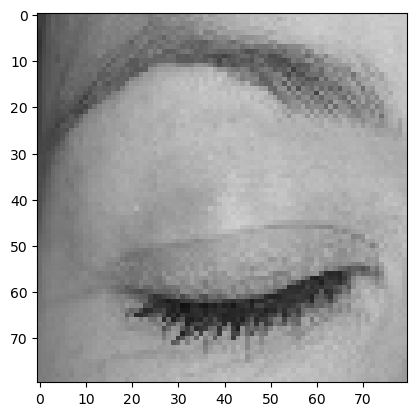

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_array = cv2.imread(r"C:\Users\DELL\Desktop\alert drowsiness\dataset\Closed\_90.jpg", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (80, 80))

y_input = np.array(new_array).reshape(1, 80, 80, 3)

y_input.shape

plt.imshow(new_array)

y_input = y_input/255.0

prediction = model.predict(y_input)

prediction

In [36]:
img_array1 = cv2.imread(r"C:\Users\DELL\Desktop\alert drowsiness\dataset\Open\_80.jpg", cv2.IMREAD_GRAYSCALE)
backtorgb1 = cv2.cvtColor(img_array1, cv2.COLOR_GRAY2RGB)
new_array1 = cv2.resize(backtorgb1, (80,80))

In [37]:
x_input = np.array(new_array1).reshape(1,80,80,3)

In [38]:
x_input.shape

(1, 80, 80, 3)

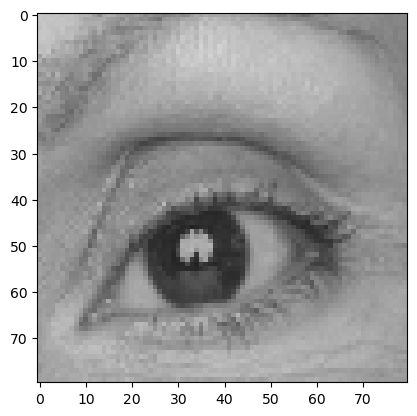

In [39]:
plt.imshow(new_array1)

In [40]:
x_input = x_input/255.0

In [41]:
prediction = model.predict(x_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [42]:
prediction

array([[0.46091813, 0.5390819 ]], dtype=float32)